# 단순 선형회귀 분석 (최소제곱법)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값 : ", mx)
print("y의 평균값 : ", my)

divisor = sum([(mx - i)**2 for i in x]) #분모
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x,mx,y,my) #분자 

print("분자 : ", dividend)
print("분모 : ", divisor)

a = dividend / divisor
b = my - (mx*a)

print("기울기 a: ", a)
print("기울기 b: ", b)
#모든 값에 대한 

x의 평균값 :  5.0
y의 평균값 :  90.5
분자 :  46.0
분모 :  20.0
기울기 a:  2.3
기울기 b:  79.0


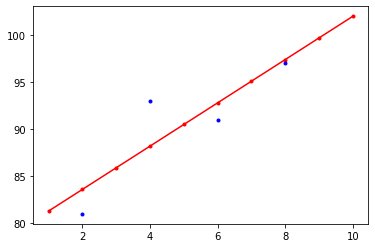

In [3]:
ins = np.linspace(1,10, num=10)
ans = np.dot(a,ins)+b
plt.plot(ins, ans, 'r')
plt.plot(ins, ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

# 단순 선형회귀분석 예제2 (평균제곱오차법)

In [4]:
#기울기a와 절편b
ab = [3, 76]
ab_old = ab

# x와 y
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#작동 시킬 함수
def predict(x):
    return ab[0]*x + ab[1]

#rmse함수 ->  손실함수 -> 실제점수와 예측점수가 얼마나 차이가 있는지 알려주는 함수
def rmse(p,a):
    return np.sqrt(((p-a) **2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" %(x[i], y[i], predict(x[i])))
print("rmse 최종값: " + str(rmse_val(predict_result, y)))

print("기울기 a = ", ab[0])
print("y절편 b = ", ab[1])

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
rmse 최종값: 3.3166247903554
기울기 a =  3
y절편 b =  76


# 경사하강법 (평균제곱오차법 이용)

In [5]:
#작동 시킬 함수
def predict(x):
    return ab[0]*x + ab[1]

def rmse(p,a):
    return np.sqrt(((p-a) **2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

#미분용 함수
def numerical_gradient(f, x, y):
    h = 1e-4
    print("x",x)
    x+h
    print("fxh1",f(x+h,y))
    print("fxh2",f(x-h,y))
    print(2*h)
    print("grad:",(f(x+h,y) -f(x-h,y)) / (2*h))
    return (f(x+h,y) -f(x-h,y)) / (2*h)

In [6]:
#경사 하강법     # 함수, x,y데이터, 기울기, 학습률, 학습횟수
def gradient_descent(f, init_data, ab, lr=0.01, step_num=100):
    np_data = np.array(init_data, "float64")
    np_ab = np.array([ab], "float64")
    #print(np_ab)
    predict_result = []
    #print(init_data)
    x = np.array([i[0] for i in init_data],"float64")
    y = np.array([i[1] for i in init_data],"float64")
    
    for i in range(step_num):
        #미분을 해야할 함수를 업데이트 -> 기존의 x를 업데이트만 하면 필요없지만 반복문에서 a,b를 업데이트하는중
        predict_result = []
        def predict(x):
            return ab[0]*x + ab[1]
        for i in range(len(x)):
            predict_result.append(predict(x[i]))
        print(predict_result)
        predict_result = np.array(predict_result, "float64")

        #미분을 통해 기울기 값을 찾아옴
        grad = numerical_gradient(f, predict_result, y)

        
        #학습률 * 기울기값을 기존 a,b의 값을 업데이트
        ab -= lr* np.mean(grad)
    print("rmse 최종값: " + str(rmse_val(predict_result, y)))
    return ab.flatten().tolist()

In [14]:
#학습할 변수
ab = [-2, 30]
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    
#기존 데이터
print("초기 기울기: ", ab)
print("rmse 최종값: " + str(rmse_val(predict_result, y)))

# 경사하강법 적용후

new_ab = gradient_descent(rmse_val, data, ab, lr=0.01, step_num=1)
print("최종 기울기: ", new_ab)

#rmse함수를 미분을 통해 경사하강시키면 손실함수 즉 예측과 실제값의 오차가 갈수록 줄어들게 되고, 값으로는 a와 b를 업데이트 함.

초기 기울기:  [-2, 30]
rmse 최종값: 71.21095421351971
[26.0, 22.0, 18.0, 14.0]
x [26. 22. 18. 14.]
fxh1 71.21085521189869
fxh2 71.21105321514351
0.0002
grad: -0.9900162240938926
rmse 최종값: 71.21095421351971
최종 기울기:  [-1.990099837759061, 30.00990016224094]


In [15]:
x = [2,4,6,8]
print(x)
h = 1e-4
x= np.array(x,"float64")+h
print(x)

[2, 4, 6, 8]
[2.0001 4.0001 6.0001 8.0001]


In [9]:
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
predict_result = np.array(predict_result, "float64")
print(predict_result)

[25.9998 21.9998 17.9998 13.9998]


In [10]:
print(ab[0], ab[1])

-2 30


In [11]:
rmse_val(predict_result, y)

71.2111522167701

In [12]:
rmse(np.array(predict_result), np.array(y))

71.2111522167701

# 학습한 결과

기존    :  [-2, 30]
학습 후 :  [-1.990099837759061, 30.00990016224094]


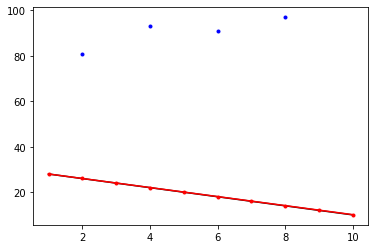

In [16]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

기존    :  [1, 10]
학습 후 :  [13.511488429951534, 22.511488429951534]


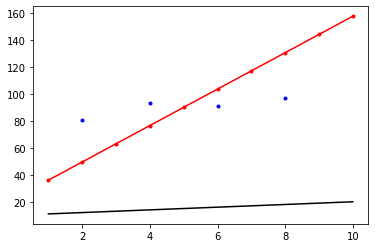

In [201]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

기존    :  [-6, 40]
학습 후 :  [7.415351742589454, 53.41535174258945]


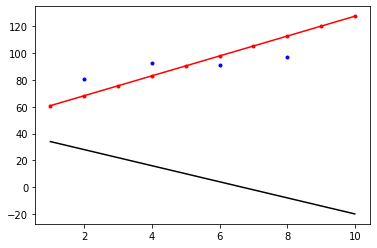

In [203]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

#####  다양한 경우에서 학습이 잘이루어지는 것을 확인할 수 있다. 

기존    :  [-2, 30]
학습 후 :  [-1.0099837759061074, 30.990016224093893]


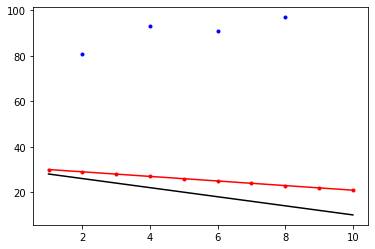

In [13]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

# 201601769 나요한